In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

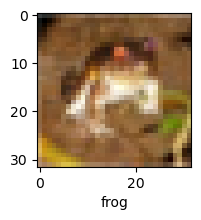

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be in the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Calculate the split point
split_point = int(0.8 * len(train_images))

# Split the dataset into training and validation sets
x_train, x_val = train_images[:split_point], train_images[split_point:]
y_train, y_val = train_labels[:split_point], train_labels[split_point:]

# Display the shapes of the datasets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", test_images.shape)


Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create the CNN model
cnn_model = models.Sequential()

# Add convolutional layers with activation and pooling
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model without the top (fully connected) layers and input shape for CIFAR-10 images
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the VGG16 base layers to prevent them from being trained
for layer in vgg16_base.layers:
    layer.trainable = False

# Create the transfer learning model by adding the VGG16 base and additional fully connected layers
transfer_model = models.Sequential()
transfer_model.add(vgg16_base)
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(256, activation='relu'))
transfer_model.add(layers.Dropout(0.5))
transfer_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
transfer_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
# Create the CNN model
cnn_model = models.Sequential()

# Add convolutional layers with activation and pooling
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model with loss function, optimizer, and evaluation metric
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [16]:
# Train the model with different hyperparameters
batch_sizes = [32, 64,]
learning_rates = [0.001]
epochs_list = [10]

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for num_epochs in epochs_list:
            print(f"\nTraining with batch_size={batch_size}, learning_rate={learning_rate}, epochs={num_epochs}")
            history = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))

            # Evaluate the model on the test set
            test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
            print(f"Test accuracy: {test_accuracy}")



Training with batch_size=32, learning_rate=0.001, epochs=10
Epoch 1/10
1250/1250 [==============================] - 113s 57ms/step - loss: 1.5508 - accuracy: 0.4331 - val_loss: 1.3657 - val_accuracy: 0.5238
Epoch 2/10
1250/1250 [==============================] - 72s 57ms/step - loss: 1.1645 - accuracy: 0.5879 - val_loss: 1.1339 - val_accuracy: 0.5903
Epoch 3/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.9980 - accuracy: 0.6469 - val_loss: 0.9914 - val_accuracy: 0.6573
Epoch 4/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.8805 - accuracy: 0.6898 - val_loss: 0.9410 - val_accuracy: 0.6709
Epoch 5/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.7905 - accuracy: 0.7228 - val_loss: 0.9386 - val_accuracy: 0.6773
Epoch 6/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.7134 - accuracy: 0.7500 - val_loss: 0.9434 - val_accuracy: 0.6823
Epoch 7/10
1250/1250 [==============================] - 67s 54

In [17]:
# Evaluate the transfer learning model on the test set
test_loss_transfer, test_accuracy_transfer = transfer_model.evaluate(test_images, test_labels)

# Print the test accuracy of the transfer learning model
print("Transfer Learning Model Test Accuracy:", test_accuracy_transfer)


313/313 [==============================] - 85s 267ms/step - loss: 2.4247 - accuracy: 0.1057
Transfer Learning Model Test Accuracy: 0.10570000112056732


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# the true labels for the test set and predicted labels for both models
cnn_true_labels = np.argmax(test_labels, axis=1)
transfer_true_labels = np.argmax(test_labels, axis=1)
cnn_predicted_labels = np.argmax(cnn_model.predict(test_images), axis=1)
transfer_predicted_labels = np.argmax(transfer_model.predict(test_images), axis=1)

# Calculate evaluation metrics for the CNN model
cnn_accuracy = accuracy_score(cnn_true_labels, cnn_predicted_labels)
cnn_precision = precision_score(cnn_true_labels, cnn_predicted_labels, average='macro')
cnn_recall = recall_score(cnn_true_labels, cnn_predicted_labels, average='macro')
cnn_f1 = f1_score(cnn_true_labels, cnn_predicted_labels, average='macro')

# Calculate evaluation metrics for the Transfer Learning model
transfer_accuracy = accuracy_score(transfer_true_labels, transfer_predicted_labels)
transfer_precision = precision_score(transfer_true_labels, transfer_predicted_labels, average='macro')
transfer_recall = recall_score(transfer_true_labels, transfer_predicted_labels, average='macro')
transfer_f1 = f1_score(transfer_true_labels, transfer_predicted_labels, average='macro')

# Print the evaluation metrics for both models
print("CNN Model Evaluation Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

print("\nTransfer Learning Model Evaluation Metrics:")
print("Accuracy:", transfer_accuracy)
print("Precision:", transfer_precision)
print("Recall:", transfer_recall)
print("F1-score:", transfer_f1)


313/313 [==============================] - 85s 270ms/step
CNN Model Evaluation Metrics:
Accuracy: 0.6784
Precision: 0.6762672027065387
Recall: 0.6784
F1-score: 0.6735186411809101

Transfer Learning Model Evaluation Metrics:
Accuracy: 0.1057
Precision: 0.09373701101544957
Recall: 0.10569999999999999
F1-score: 0.035272068411233856


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN Model Evaluation Metrics:
Accuracy: 0.6784
Precision: 0.6762672027065387
Recall: 0.6784
F1-score: 0.6735186411809101

Transfer Learning Model Evaluation Metrics:
Accuracy: 0.1057
Precision: 0.09373701101544957
Recall: 0.10569999999999999
F1-score: 0.035272068411233856


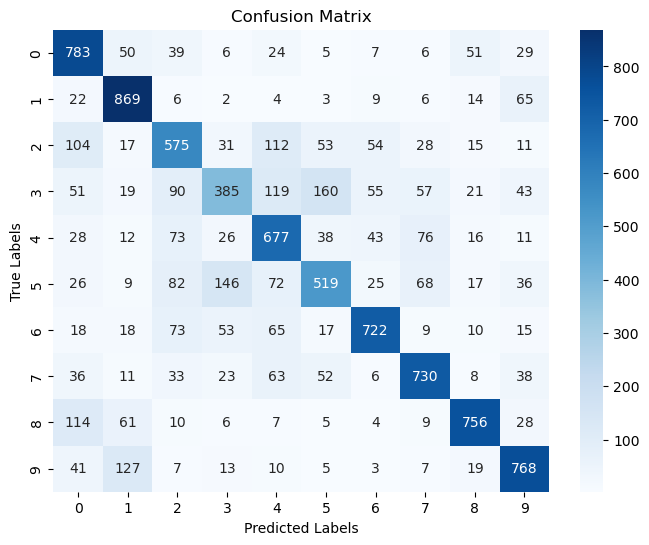

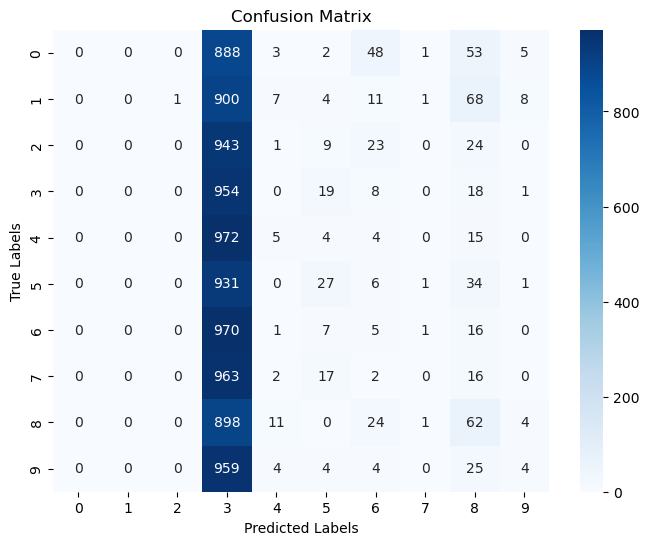

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#  the test images and labels
test_images, test_labels = tf.keras.datasets.cifar10.load_data()[1]
test_images = test_images / 255.0
test_labels = to_categorical(test_labels, num_classes=10)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to calculate evaluation metrics
def calculate_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

#  evaluated the models and have the predicted labels and true labels
cnn_predicted_labels =cnn_predicted_labels
transfer_predicted_labels = transfer_predicted_labels
cnn_true_labels = np.argmax(test_labels, axis=1)
transfer_true_labels = np.argmax(test_labels, axis=1)

# Calculate and print evaluation metrics for both models
cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = calculate_evaluation_metrics(cnn_true_labels, cnn_predicted_labels)
transfer_accuracy, transfer_precision, transfer_recall, transfer_f1 = calculate_evaluation_metrics(transfer_true_labels, transfer_predicted_labels)

print("CNN Model Evaluation Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

print("\nTransfer Learning Model Evaluation Metrics:")
print("Accuracy:", transfer_accuracy)
print("Precision:", transfer_precision)
print("Recall:", transfer_recall)
print("F1-score:", transfer_f1)

# Plot the confusion matrix for both models
class_labels = [str(i) for i in range(10)]
plot_confusion_matrix(cnn_true_labels, cnn_predicted_labels, class_labels)
plot_confusion_matrix(transfer_true_labels, transfer_predicted_labels, class_labels)


Model Comparison - Evaluation Metrics:
               Model  Accuracy  Precision  Recall  F1-score
0                CNN    0.6784   0.676267  0.6784  0.673519
1  Transfer Learning    0.1057   0.093737  0.1057  0.035272


<Figure size 1000x600 with 0 Axes>

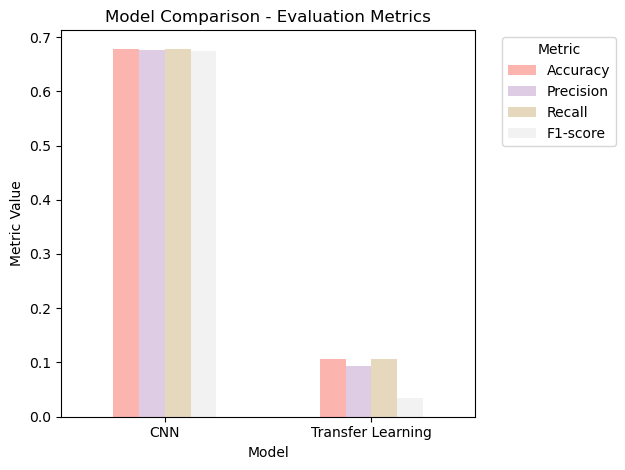

In [20]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics
evaluation_data = {
    'Model': ['CNN', 'Transfer Learning'],
    'Accuracy': [cnn_accuracy, transfer_accuracy],
    'Precision': [cnn_precision, transfer_precision],
    'Recall': [cnn_recall, transfer_recall],
    'F1-score': [cnn_f1, transfer_f1]
}

evaluation_df = pd.DataFrame(evaluation_data)

# Display the table
print("Model Comparison - Evaluation Metrics:")
print(evaluation_df)
# Bar plot for Accuracy, Precision, Recall, and F1-score
plt.figure(figsize=(10, 6))
evaluation_df.set_index('Model').plot(kind='bar', colormap='Pastel1', rot=0)
plt.title('Model Comparison - Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
#step4.1


Epoch 1/20
625/625 [==============================] - 69s 102ms/step - loss: 1.5868 - accuracy: 0.4241 - val_loss: 1.2951 - val_accuracy: 0.5378
Epoch 2/20
625/625 [==============================] - 62s 99ms/step - loss: 1.1832 - accuracy: 0.5792 - val_loss: 1.1150 - val_accuracy: 0.6055
Epoch 3/20
625/625 [==============================] - 69s 110ms/step - loss: 1.0152 - accuracy: 0.6455 - val_loss: 1.0562 - val_accuracy: 0.6332
Epoch 4/20
625/625 [==============================] - 78s 124ms/step - loss: 0.9038 - accuracy: 0.6828 - val_loss: 0.9117 - val_accuracy: 0.6822
Epoch 5/20
625/625 [==============================] - 75s 120ms/step - loss: 0.8069 - accuracy: 0.7190 - val_loss: 0.9083 - val_accuracy: 0.6874
Epoch 6/20
625/625 [==============================] - 64s 103ms/step - loss: 0.7281 - accuracy: 0.7454 - val_loss: 0.8815 - val_accuracy: 0.6941
Epoch 7/20
625/625 [==============================] - 64s 102ms/step - loss: 0.6639 - accuracy: 0.7665 - val_loss: 0.8819 - val_acc

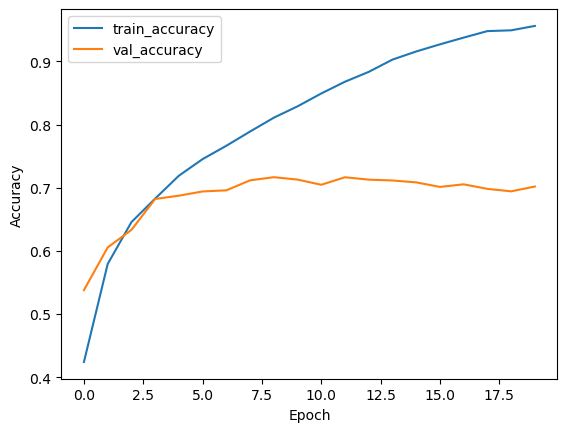

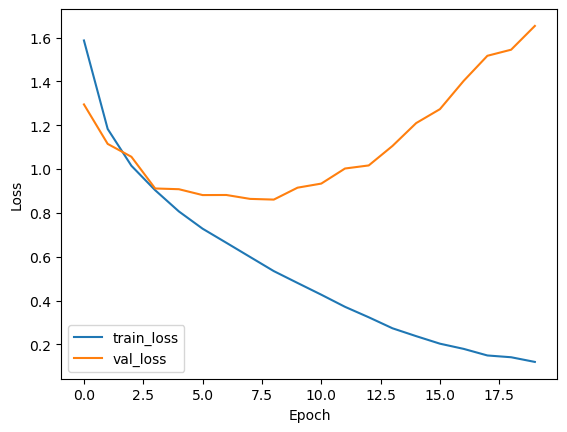

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split the dataset into training, validation, and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

# Build and compile the CNN model
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model while monitoring performance on the validation set
history = cnn_model.fit(train_images, train_labels, batch_size=64,
                        epochs=20, validation_data=(val_images, val_labels))

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
625/625 [==============================] - 66s 99ms/step - loss: 1.6466 - accuracy: 0.3952 - val_loss: 1.3234 - val_accuracy: 0.5259
Epoch 2/20
625/625 [==============================] - 61s 98ms/step - loss: 1.2963 - accuracy: 0.5339 - val_loss: 1.1328 - val_accuracy: 0.5933
Epoch 3/20
625/625 [==============================] - 61s 97ms/step - loss: 1.1482 - accuracy: 0.5918 - val_loss: 1.0189 - val_accuracy: 0.6413
Epoch 4/20
625/625 [==============================] - 60s 96ms/step - loss: 1.0440 - accuracy: 0.6295 - val_loss: 0.9753 - val_accuracy: 0.6540
Epoch 5/20
625/625 [==============================] - 60s 96ms/step - loss: 0.9599 - accuracy: 0.6629 - val_loss: 0.8762 - val_accuracy: 0.6860
Epoch 6/20
625/625 [==============================] - 60s 96ms/step - loss: 0.8944 - accuracy: 0.6846 - val_loss: 0.8870 - val_accuracy: 0.6887
Epoch 7/20
625/625 [==============================] - 62s 99ms/step - loss: 0.8516 - accuracy: 0.6987 - val_loss: 0.8386 - val_accuracy:

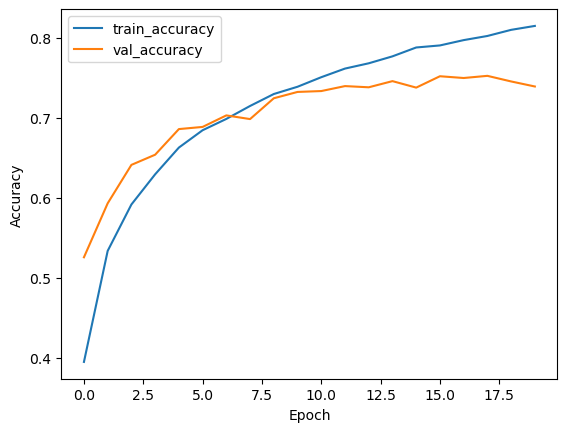

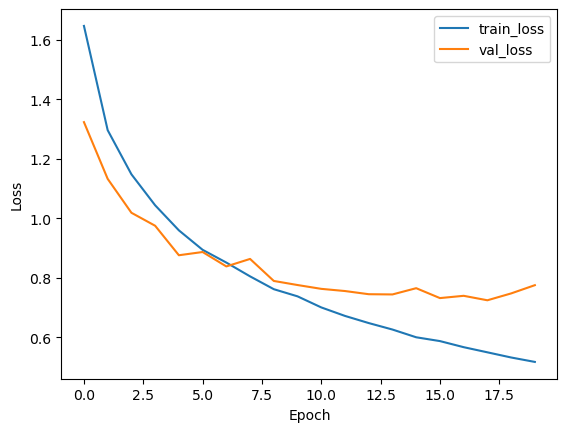

In [26]:
#4.2

from tensorflow.keras.datasets import cifar10


# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split the dataset into training, validation, and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

# Build and compile the CNN model with dropout regularization
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Adding dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model while monitoring performance on the validation set
history = cnn_model.fit(train_images, train_labels, batch_size=64,
                        epochs=20, validation_data=(val_images, val_labels))

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
#4.3
# Evaluate model performance on the training set
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Evaluate model performance on the testing set
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)


1250/1250 [==============================] - 17s 14ms/step - loss: 0.3638 - accuracy: 0.8780
Training Loss: 0.3638496696949005
Training Accuracy: 0.8779500126838684
313/313 [==============================] - 4s 13ms/step - loss: 0.7796 - accuracy: 0.7354
Testing Loss: 0.7795860171318054
Testing Accuracy: 0.7354000210762024
